### Random Value Imputation

- Randomily select the values from dataframe and replacing it with null values 
- It can be applied to both numeric and category features.
- Module is available in pandas , it is not present in sklearn.
- Distribution and variance does not get changed .
- Covariance gets affected.

### Adavantages
- Simple to implement.
- Well suited for linear models such as linear regression.

### Disadvantages
- Huge memory is required is this method is used for deployed purpose.


### Simple Missing Indicator

- Create a new features , inside that values will be true or false .
- If feature value = Null ,then True else False.

### Automatically select values for imputation

- using GridSearchCV 


### Numerical Data 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('D:\\Sandesh\\100-days-of-machine-learning\\day38-missing-indicator\\train.csv')
df = df[['Survived','Age','Fare']]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df.shape

(891, 3)

In [5]:
X=df.drop(columns=['Survived'])
y=df[['Survived']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:

# Create a new column so that we can replace the null values in that columns
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']


In [7]:

# We have replace the null values in age_imputed column with random values
# of age features

X_train['Age_imputed'][X_train['Age_imputed'].isnull()]= X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]= X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [8]:
X_train.isnull().sum()

Age            144
Fare             0
Age_imputed      0
dtype: int64

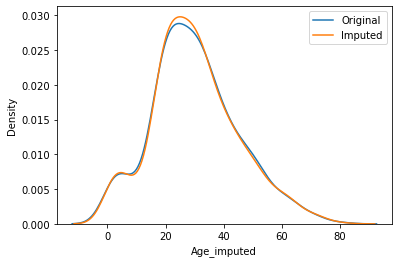

In [9]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

# Both the distibution is same.

In [10]:

# No change in Variance
print(X_train['Age'].var())
print(X_train['Age_imputed'].var())


220.7125508594779
218.51357041494802


In [11]:

# Change in co-variance
X_train[['Fare','Age','Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2144.981210,74.406949,70.836542
Age,74.406949,220.712551,220.712551
Age_imputed,70.836542,220.712551,218.513570


<AxesSubplot:>

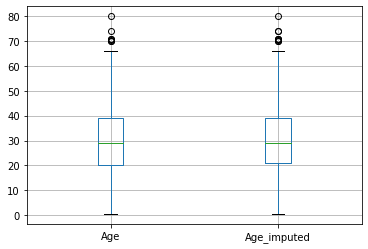

In [12]:
X_train[['Age','Age_imputed']].boxplot()

# Outliers are not handled it remains the same.


### Categorial Data 

In [13]:
data =pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day38-missing-indicator\\house-train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
data =data[['GarageQual','FireplaceQu','SalePrice']]

In [15]:
data.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [16]:
X=data
y=data['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X_train['GarageQual_Imputed']=X_train['GarageQual']
X_test['GarageQual_Imputed']=X_test['GarageQual']

X_train['FireplaceQu_Imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_Imputed']=X_test['FireplaceQu']


In [18]:

# 

temp=pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_Imputed'].value_counts()/len(X_train)
    ],axis=1)
temp.columns=['Original','Imputed']
temp

,Original,Imputed
TA,0.947606,0.898116
Fa,0.036134,0.034247
Gd,0.011743,0.011130
Po,0.002710,0.002568
Ex,0.001807,0.001712


In [19]:

temp=pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_Imputed'].value_counts()/len(df)
    ],axis=1)
temp.columns=['Original','Imputed']
temp

,Original,Imputed
Gd,0.501613,0.349046
TA,0.398387,0.277217
Fa,0.043548,0.030303
Ex,0.032258,0.022447
Po,0.024194,0.016835


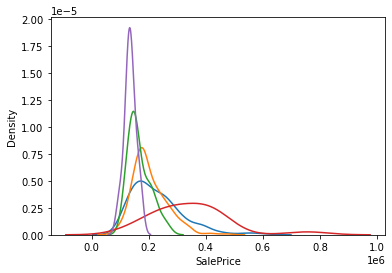

In [20]:
for cols in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==cols]['SalePrice'],
                hist=False,label=cols)
plt.show()    

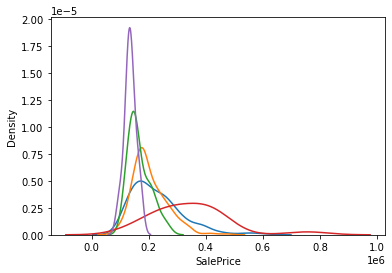

In [21]:

# Distribution is getting changed , so not a good solution.
# For linear models.

for cols in X_train['FireplaceQu_Imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_Imputed']==cols]['SalePrice'],
                hist=False,label=cols)
plt.show()   

# Missing Indicator 

- Create a new features , inside that values will be true or false .
- If feature value = Null ,then True else False.


In [8]:
df=pd.read_csv('D:\\Sandesh\\100-days-of-machine-learning\\day38-missing-indicator\\train.csv',usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:

# Before and after using this technique

from sklearn.impute import SimpleImputer
si=SimpleImputer()
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [25]:
X_train_trf

array([[30.16623239, 23.25      ],
       [30.        , 56.9292    ],
       [34.        , 10.5       ],
       ...,
       [21.        , 73.5       ],
       [30.16623239,  7.55      ],
       [21.        ,  8.05      ]])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train_trf,y_train)
y_pred= lr.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6033519553072626

#### Now will apply Missing Indicator 

In [14]:
from sklearn.impute import MissingIndicator

mi=MissingIndicator()
X_train_missing= mi.fit_transform(X_train)
X_test_missing=mi.transform(X_test)
# It has create new features which is having values true and false.


In [15]:
mi.features_

array([0], dtype=int64)

In [16]:
X_train_missing

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [29]:

# Add this new features into odd data
X_train['Age_NA']=X_train_missing
X_test['Age_NA']=X_test_missing


In [30]:
si=SimpleImputer()
X_train_trf2=si.fit_transform(X_train)
X_test_trf2=si.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train_trf2,y_train)
y_pred= lr.predict(X_test_trf2)
accuracy_score(y_test,y_pred)


0.6256983240223464

### There is a hyperparameter in SimpleImputer for Missing Indicator , there is no need to create new features and add values , instead we can use add_indicator=True

In [31]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
si=SimpleImputer(add_indicator=True)
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train_trf,y_train)
y_pred= lr.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6256983240223464

## Automatically Impute Parameters

In [33]:
df=pd.read_csv('D:\\Sandesh\\100-days-of-machine-learning\\day38-missing-indicator\\train.csv')
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)


In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [55]:
# For numerical values - 1.SimpleImputator 2.StandardScaler
# For categorical values - 1.SimpleImputator 2.OneHotEncoding.

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [57]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [58]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [59]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [60]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [61]:
print(grid_search.best_score_)

0.7753521126760563


In [66]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009803,0.002519,0.003054,0.000981,0.1,most_frequent,mean,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",0.763889,0.736111,...,0.830986,0.830986,0.816901,0.704225,0.760563,0.788732,0.760563,0.773944,0.040096,13
1,0.008781,0.000686,0.002989,0.000630,0.1,most_frequent,median,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",0.763889,0.736111,...,0.830986,0.830986,0.816901,0.704225,0.760563,0.788732,0.760563,0.773944,0.040096,13
2,0.008228,0.000405,0.002891,0.000299,0.1,constant,mean,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",0.763889,0.736111,...,0.830986,0.830986,0.816901,0.704225,0.760563,0.788732,0.760563,0.773944,0.040096,13
3,0.009087,0.001801,0.003019,0.000454,0.1,constant,median,"{'classifier__C': 0.1, 'preprocessor__cat__imp...",0.763889,0.736111,...,0.830986,0.830986,0.816901,0.704225,0.760563,0.788732,0.760563,0.773944,0.040096,13
4,0.009468,0.001441,0.003295,0.000456,1.0,most_frequent,mean,"{'classifier__C': 1.0, 'preprocessor__cat__imp...",0.763889,0.736111,...,0.830986,0.830986,0.816901,0.718310,0.760563,0.788732,0.760563,0.775352,0.037804,1


In [62]:
cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results = cv_results.sort_values("mean_test_score", ascending=False)

cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy',
            'param_preprocessor__num__imputer__strategy','mean_test_score']]


,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.775352
5,1.0,most_frequent,median,0.775352
6,1.0,constant,mean,0.775352
7,1.0,constant,median,0.775352
8,10,most_frequent,mean,0.775352
9,10,most_frequent,median,0.775352
10,10,constant,mean,0.775352
11,10,constant,median,0.775352
12,100,most_frequent,mean,0.775352
13,100,most_frequent,median,0.775352


## THE END 